In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading each CSV separately
customers_df = pd.read_csv('/content/drive/MyDrive/Data Science Projects /customers.csv', encoding='utf-8-sig')
properties_df = pd.read_csv('/content/drive/MyDrive/Data Science Projects /properties.csv', encoding='utf-8-sig')

customers_df.head()


,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [ ]:
properties_df.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [ ]:
properties_df.info()
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   unnamed: 0   267 non-null    int64         
 1   id           267 non-null    int64         
 2   building     267 non-null    int64         
 3   date_sale    195 non-null    datetime64[ns]
 4   type         267 non-null    object        
 5   property#    267 non-null    int64         
 6   area         267 non-null    float64       
 7   price        267 non-null    float64       
 8   status       267 non-null    object        
 9   customer_id  267 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 21.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unnam

In [ ]:
customers_df.isna()

,unnamed: 0,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,False,False,False,False,False,False,False,False,False,False,False,False,False
158,False,False,False,False,False,False,False,False,False,False,False,False,False
159,False,False,False,False,False,False,False,False,False,False,False,False,False
160,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print("Properties DataFrame columns:")
print(properties_df.columns)
print("\nCustomers DataFrame columns:")
print(customers_df.columns)

Properties DataFrame columns:
Index(['unnamed: 0', 'id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customer_id'],
      dtype='object')

Customers DataFrame columns:
Index(['unnamed: 0', 'customer_id', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [ ]:
# Step 1: Strip and clean column names to remove any extra spaces or special characters
properties_df.columns = properties_df.columns.str.strip()
customers_df.columns = customers_df.columns.str.strip()

# Step 2: Rename columns to standardize the 'customerid' column
properties_df.rename(columns={'﻿id': 'id', 'customerid': 'customer_id'}, inplace=True)
customers_df.rename(columns={'﻿customerid': 'customer_id'}, inplace=True)

# Step 3: Inspect and convert data types
# Convert date columns to datetime and price column to numeric after removing any non-numeric symbols
properties_df['date_sale'] = pd.to_datetime(properties_df['date_sale'], errors='coerce')
properties_df['price'] = properties_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Step 4: Handle missing values (example: fill with 'unknown' or drop if necessary)
properties_df['customer_id'] = properties_df['customer_id'].fillna('unknown')
customers_df['state'] = customers_df['state'].fillna('unknown')

# Step 5: Merge on 'customer_id'
real_estate_df = pd.merge(properties_df, customers_df, on='customer_id', how='left')

# Sanity check
print(real_estate_df.info())
print(real_estate_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unnamed: 0_x       267 non-null    int64         
 1   id                 267 non-null    int64         
 2   building           267 non-null    int64         
 3   date_sale          195 non-null    datetime64[ns]
 4   type               267 non-null    object        
 5   property#          267 non-null    int64         
 6   area               267 non-null    float64       
 7   price              267 non-null    float64       
 8   status             267 non-null    object        
 9   customer_id        267 non-null    object        
 10  unnamed: 0_y       195 non-null    float64       
 11  entity             195 non-null    object        
 12  name               195 non-null    object        
 13  surname            195 non-null    object        
 14  birth_date

In [ ]:
print(real_estate_df.info())
print(real_estate_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unnamed: 0_x       267 non-null    int64         
 1   id                 267 non-null    int64         
 2   building           267 non-null    int64         
 3   date_sale          195 non-null    datetime64[ns]
 4   type               267 non-null    object        
 5   property#          267 non-null    int64         
 6   area               267 non-null    float64       
 7   price              267 non-null    float64       
 8   status             267 non-null    object        
 9   customer_id        267 non-null    object        
 10  unnamed: 0_y       195 non-null    float64       
 11  entity             195 non-null    object        
 12  name               195 non-null    object        
 13  surname            195 non-null    object        
 14  birth_date

In [ ]:
df = real_estate_df

print(df.columns.tolist())

['unnamed: 0_x', 'id', 'building', 'date_sale', 'type', 'property#', 'area', 'price', 'status', 'customer_id', 'unnamed: 0_y', 'entity', 'name', 'surname', 'birth_date', 'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unnamed: 0_x       267 non-null    int64         
 1   id                 267 non-null    int64         
 2   building           267 non-null    int64         
 3   date_sale          195 non-null    datetime64[ns]
 4   type               267 non-null    object        
 5   property#          267 non-null    int64         
 6   area               267 non-null    float64       
 7   price              267 non-null    float64       
 8   status             267 non-null    object        
 9   customer_id        267 non-null    object        
 10  unnamed: 0_y       195 non-null    float64       
 11  entity             195 non-null    object        
 12  name               195 non-null    object        
 13  surname            195 non-null    object        
 14  birth_date

In [ ]:
df.head()

,unnamed: 0_x,id,building,date_sale,type,property#,area,price,status,customer_id,...,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,1030,1,2005-11-01,apartment,30,743.09,246172.68,sold,c0028,...,madalyn,mercer,1986-06-21,NaN,usa,california,home,5.0,no,website
1,1,1029,1,2005-10-01,apartment,29,756.21,246331.90,sold,c0027,...,lara,carrillo,1983-02-24,NaN,usa,california,home,5.0,no,website
2,2,2002,2,2007-07-01,apartment,2,587.28,209280.91,sold,c0112,...,donavan,flowers,1985-12-27,NaN,usa,california,home,1.0,yes,client
3,3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,sold,c0160,...,darien,dorsey,1985-12-27,NaN,usa,california,investment,3.0,yes,website
4,4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,sold,c0014,...,alessandra,perry,1979-05-15,NaN,usa,california,home,4.0,no,agency


In [ ]:
df.tail()

,unnamed: 0_x,id,building,date_sale,type,property#,area,price,status,customer_id,...,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
262,262,5044,5,NaT,apartment,44,1238.58,322610.74,-,unknown,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,263,5047,5,NaT,apartment,47,794.52,279191.26,-,unknown,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,264,5048,5,NaT,apartment,48,1013.27,287996.53,-,unknown,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,265,5050,5,NaT,apartment,50,1074.71,365868.78,-,unknown,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,266,5051,5,NaT,apartment,51,789.25,199216.40,-,unknown,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To get a quick summary of the numerical columns, I use the following codes

In [ ]:
# Summary of numerical variables
numerical_summary = df.describe()
print(numerical_summary)


       unnamed: 0_x           id    building                      date_sale  \
count    267.000000   267.000000  267.000000                            195   
mean     133.000000  2975.142322    2.947566  2006-11-08 14:38:46.153846272   
min        0.000000  1002.000000    1.000000            2004-03-01 00:00:00   
25%       66.500000  2015.500000    2.000000            2006-04-16 00:00:00   
50%      133.000000  3024.000000    3.000000            2007-03-01 00:00:00   
75%      199.500000  4031.500000    4.000000            2007-09-01 00:00:00   
max      266.000000  5052.000000    5.000000            2010-05-01 00:00:00   
std       77.220464  1392.197474    1.391794                            NaN   

        property#         area          price  unnamed: 0_y  \
count  267.000000   267.000000     267.000000    195.000000   
mean    27.580524   936.221311  281171.901386     72.800000   
min      1.000000   410.710000  117564.070000      0.000000   
25%     14.500000   756.210000  2175

Sales and Overall Performance by Building Type
Firstly, to  Determine Unique Building Types, I have to
Identify the distinct building types.

In [ ]:
# Unique building types
building_types = df['building'].unique()
print(building_types)


[1 2 3 4 5]


Totals by Building Type
Focus on relevant columns to examine the total properties sold and those with mortgages by building type.

In [ ]:
# Totals by building type: sold properties and properties with mortgages
building_totals = df.groupby('building').agg(
    total_sold=('status', lambda x: (x == 'Sold').sum()),         # Count of Sold properties
    total_mortgages=('mortgage', lambda x: (x == 'Yes').sum())    # Count of properties with mortgage
).reset_index()
print(building_totals)


   building  total_sold  total_mortgages
0         1           0                0
1         2           0                0
2         3           0                0
3         4           0                0
4         5           0                0


Then Averages by Building Type
Now, calculate the average area, price, and deal satisfaction per building type.

In [ ]:
# Averages by building type
building_averages = df.groupby('building').agg(
    avg_area=('area', 'mean'),
    avg_price=('price', 'mean'),
    avg_deal_satisfaction=('deal_satisfaction', 'mean')
).reset_index()
print(building_averages)


   building    avg_area      avg_price  avg_deal_satisfaction
0         1  928.038846  275143.242500               3.630435
1         2  943.891930  286661.848246               3.518519
2         3  927.852381  280451.255556               3.566038
3         4  974.720930  290239.515581               3.869565
4         5  914.298654  274557.604615               3.526316


Sales and Overall Performance by Country
Totals by Country
Calculate the total properties sold and those with mortgages by country.

In [ ]:
# Totals by country
country_totals = df.groupby('country').agg(
    total_sold=('status', lambda x: (x == 'Sold').sum()),
    total_mortgages=('mortgage', lambda x: (x == 'Yes').sum())
).reset_index()
print(country_totals)


   country  total_sold  total_mortgages
0  belgium           0                0
1   canada           0                0
2  denmark           0                0
3  germany           0                0
4   mexico           0                0
5   russia           0                0
6       uk           0                0
7      usa           0                0
8     usa            0                0


Averages by Country
Calculate the average values for area, price, and deal satisfaction by country.

In [ ]:
# Then I try to find the Averages by country
# By Calculating averages by country and sort by avg_deal_satisfaction in descending order
country_averages = df.groupby('country').agg(
    avg_area=('area', 'mean'),
    avg_price=('price', 'mean'),
    avg_deal_satisfaction=('deal_satisfaction', 'mean')
).reset_index().sort_values(by='avg_deal_satisfaction', ascending=False)

print(country_averages)


   country     avg_area      avg_price  avg_deal_satisfaction
1   canada   917.382857  274069.384286                5.00000
3  germany   743.410000  205098.210000                5.00000
8     usa    887.565833  261679.335000                4.75000
6       uk   739.480000  220142.680000                4.00000
7      usa   901.756545  270708.407030                3.49697
0  belgium   852.730000  229075.470000                3.00000
4   mexico  1283.450000  338181.180000                3.00000
5   russia   903.757500  278828.835000                2.50000
2  denmark   785.480000  257183.480000                1.00000


Sales and Overall Performance by State
Frequency Distribution by State
First, determine the frequency distribution of properties by state.



In [ ]:
# Frequency distribution by state
state_distribution = df['state'].value_counts().reset_index()
state_distribution.columns = ['state', 'frequency']
print(state_distribution)


        state  frequency
0  california        120
1      nevada         17
2     unknown         14
3     arizona         11
4      oregon         11
5    colorado         11
6        utah          5
7    virginia          4
8      kansas          1
9     wyoming          1


Relative and Cumulative Frequency by State
Calculate the relative frequency and cumulative frequency.

In [ ]:
# Calculate relative and cumulative frequencies
state_distribution['relative_frequency'] = state_distribution['frequency'] / state_distribution['frequency'].sum()
state_distribution['cumulative_frequency'] = state_distribution['frequency'].cumsum()
print(state_distribution)


        state  frequency  relative_frequency  cumulative_frequency
0  california        120            0.615385                   120
1      nevada         17            0.087179                   137
2     unknown         14            0.071795                   151
3     arizona         11            0.056410                   162
4      oregon         11            0.056410                   173
5    colorado         11            0.056410                   184
6        utah          5            0.025641                   189
7    virginia          4            0.020513                   193
8      kansas          1            0.005128                   194
9     wyoming          1            0.005128                   195


**Analyzing Age**
By Calculating Customer Age at Purchase: To get the customer's age at the time of purchase, calculate the difference between the date_sale and birth_date columns, converting this to years.

In [ ]:
from datetime import datetime

# Calculate age at time of sale
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['date_sale'] = pd.to_datetime(df['date_sale'])
df['age_at_purchase'] = (df['date_sale'] - df['birth_date']).dt.days / 365.25  # convert days to years
df['age_at_purchase'] = df['age_at_purchase'].round(1)


Create Age Intervals: Define the age intervals based on the specified bins, then categorize the age_at_purchase variable into these intervals.

In [ ]:
# Define age intervals
age_bins = [19, 25, 31, 36, 42, 48, 54, 59, 65, 71, 76]
age_labels = ["(19, 25]", "(25, 31]", "(31, 36]", "(36, 42]", "(42, 48]", "(48, 54]", "(54, 59]", "(59, 65]", "(65, 71]", "(71, 76]"]
df['age_interval'] = pd.cut(df['age_at_purchase'], bins=age_bins, labels=age_labels, right=True)


Break Down Properties Sold by Age Intervals: Group by age_interval to get a count of properties sold within each age group.

In [ ]:
# Count properties sold by age interval with observed=False to avoid warning
age_interval_counts = df.groupby('age_interval', observed=False)['id'].count().reset_index().rename(columns={'id': 'properties_sold'})
print(age_interval_counts)


  age_interval  properties_sold
0     (19, 25]                4
1     (25, 31]               16
2     (31, 36]               24
3     (36, 42]               35
4     (42, 48]               24
5     (48, 54]               23
6     (54, 59]               19
7     (59, 65]               11
8     (65, 71]               18
9     (71, 76]                3


Analyzing Properties’ Prices
Create Price Intervals: Similar to the age intervals, divide the price column into 10 bins and analyze the distribution.

In [ ]:
# Create 10 price bins
price_bins = 10
df['price_interval'] = pd.cut(df['price'], bins=price_bins)

# Count properties in each price bin
price_interval_sales = df.groupby('price_interval').size().reset_index(name='properties_sold')
print(price_interval_sales)


             price_interval  properties_sold
0  (117143.362, 159634.837]                3
1  (159634.837, 201705.604]               32
2  (201705.604, 243776.371]               88
3  (243776.371, 285847.138]               47
4  (285847.138, 327917.905]               31
5  (327917.905, 369988.672]               18
6  (369988.672, 412059.439]               21
7  (412059.439, 454130.206]                7
8  (454130.206, 496200.973]               11
9   (496200.973, 538271.74]                9


<ipython-input-239-7704ccd82d2c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_interval_sales = df.groupby('price_interval').size().reset_index(name='properties_sold')


Now to find Relationship between Properties and Age    .Calculate Covariance and Correlation between Age and Price: Use cov() for covariance and corr() for correlation on the age_at_purchase and price columns to analyze the relationship.

In [ ]:
# Calculate covariance and correlation
covariance = df[['age_at_purchase', 'price']].cov().iloc[0, 1]
correlation = df[['age_at_purchase', 'price']].corr().iloc[0, 1]

print("Covariance between age and price:", covariance)
print("Correlation between age and price:", correlation)


Covariance between age and price: -177674.48764197205
Correlation between age and price: -0.17447695214594985


In [ ]:
# Drop rows with NaN values in 'price' or 'age_at_purchase'
df_age_price = df.dropna(subset=['price', 'age_at_purchase'])

# Calculate covariance
covariance = df_age_price['price'].cov(df_age_price['age_at_purchase'])
print(f"Covariance between price and age_at_purchase: {covariance}")

# Calculate correlation
correlation = df_age_price['price'].corr(df_age_price['age_at_purchase'])
print(f"Correlation between price and age_at_purchase: {correlation}")


Covariance between price and age_at_purchase: -177674.4876419729
Correlation between price and age_at_purchase: -0.17447695214595046


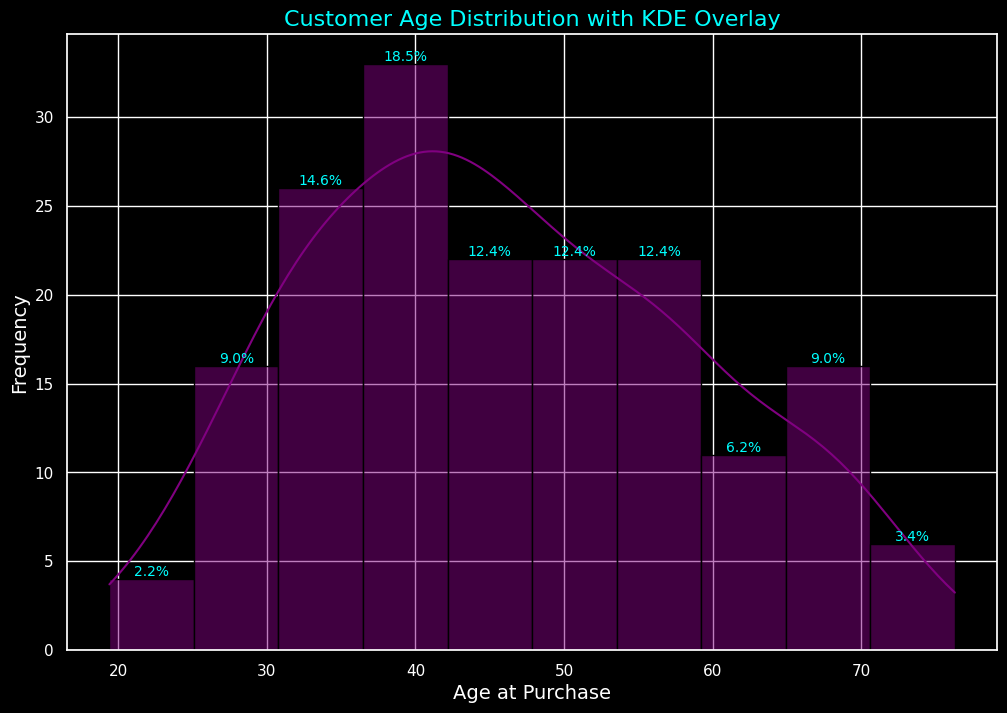

In [ ]:
# Age Distribution Plot
plt.figure(figsize=(12, 8))
age_plot = sns.histplot(df['age_at_purchase'], bins=10, kde=True, color="purple", edgecolor="black")
total = len(df["age_at_purchase"].dropna())
for patch in age_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = f'{(height / total * 100):.1f}%'
        age_plot.annotate(percentage,
                          (patch.get_x() + patch.get_width() / 2, height),
                          ha='center', va='bottom', color="cyan", fontsize=10)
plt.title("Customer Age Distribution with KDE Overlay", fontsize=16, color="cyan")
plt.xlabel("Age at Purchase", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


<ipython-input-243-8a3334a15f36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_interval_sales, x='age_interval', y='properties_sold', palette="magma")


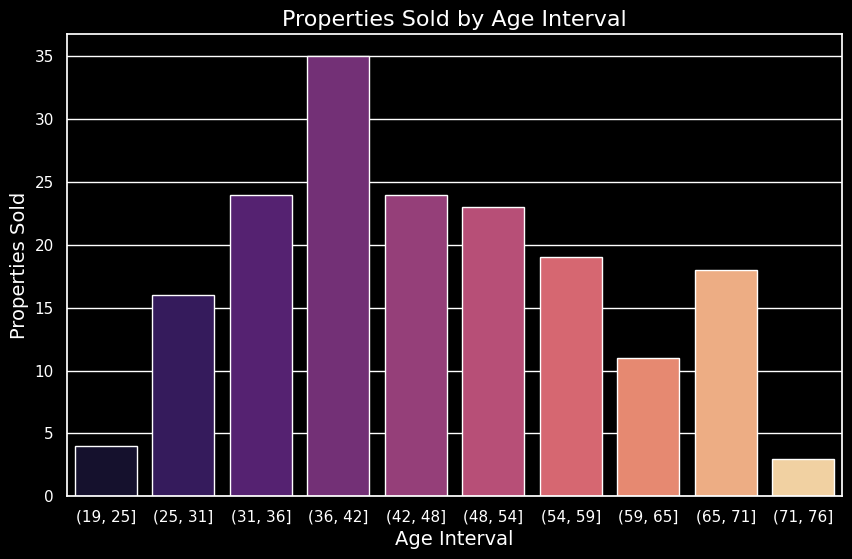

In [ ]:
#  Properties Sold by Age Interval (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=age_interval_sales, x='age_interval', y='properties_sold', palette="magma")
plt.title("Properties Sold by Age Interval", fontsize=16)
plt.xlabel("Age Interval", fontsize=14)
plt.ylabel("Properties Sold", fontsize=14)
plt.show()



# **Highest Buyer Potential:**

The (36, 42] age group has the highest buyer activity with 35 properties sold. This is closely followed by the (31, 36] and (42, 48] age intervals, with 24 properties sold each. Insight: Buyers in their mid-30s to early 40s are the most active segment. This age group is likely in a stable financial position and looking for long-term investments in real estate. Age-Related Strategy:

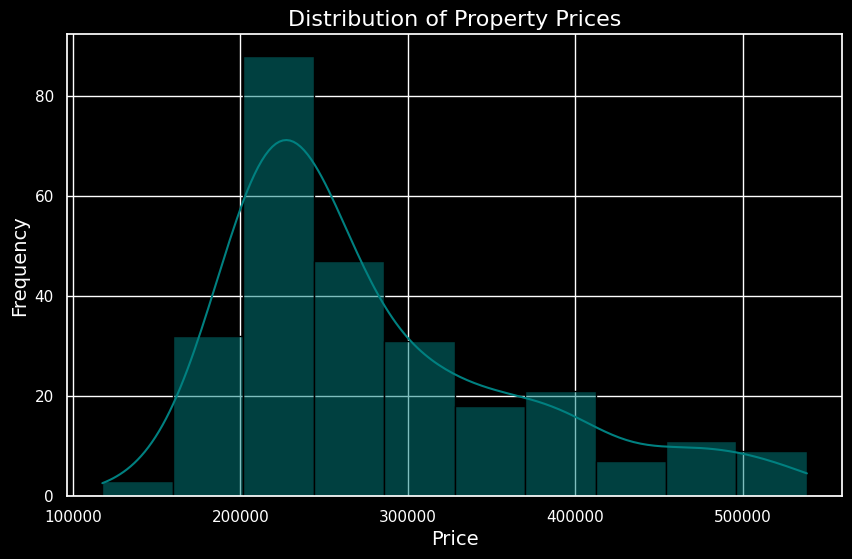

In [ ]:
# Price Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=10, kde=True, color="teal", edgecolor="black")
plt.title("Distribution of Property Prices", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


# **Property Price Profile Analysis**
Price Intervals with Highest Sales:

Properties priced in the (201,705 to 243,776] range have the highest sales, with 88 properties sold. Following this, the (243,776 to 285,847] interval has 47 properties sold.
Insight: There’s a clear preference for properties in the mid-tier price range, around 200,000 to 285,000. Higher-priced properties see a steep drop in demand.

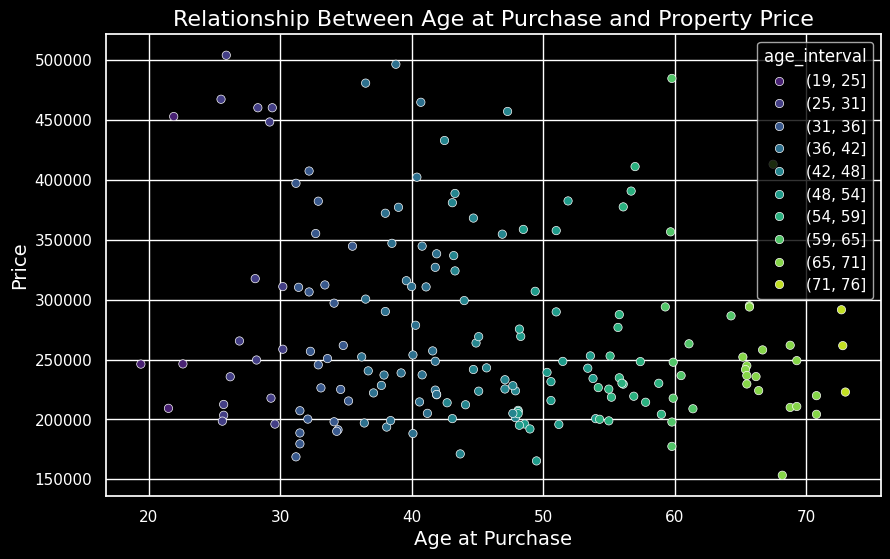

In [ ]:
# Price vs. Age Correlation Plot (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_at_purchase', y='price', hue='age_interval', palette="viridis")
plt.title("Relationship Between Age at Purchase and Property Price", fontsize=16)
plt.xlabel("Age at Purchase", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()


** Deal Satisfaction by Country and State**
Chart Type: Heat Map or Bar Chart
Steps:
Calculate average deal_satisfaction by country and state using groupby.
Heat Map: Use Seaborn’s heatmap to show deal_satisfaction by country and state.
Bar Chart (if preferred): Plot average deal_satisfaction for each country (and/or each state within the country).

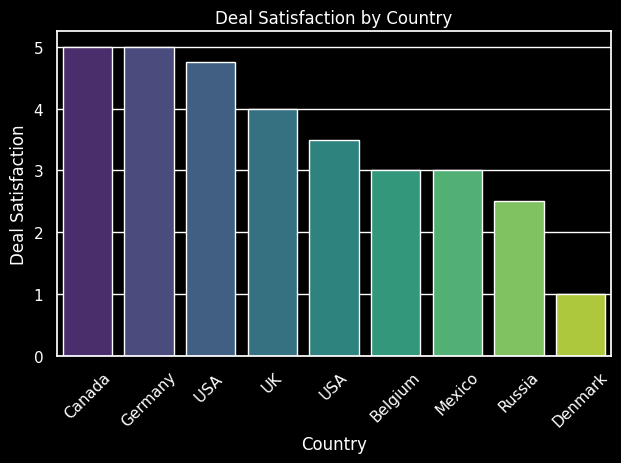

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the data by deal_satisfaction in descending order
country_satisfaction_sorted = country_satisfaction.sort_values('deal_satisfaction', ascending=False)

# Create the sorted bar plot
sns.barplot(data=country_satisfaction_sorted,
            x='country',
            y='deal_satisfaction',
            hue='country',
            legend=False,
            palette='viridis')

# Customize the plot
plt.title('Deal Satisfaction by Country')
plt.xlabel('Country')
plt.ylabel('Deal Satisfaction')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

**My Insight** From the above chart, Canada and Germany are among the top on deal satisfaction rate, while Denmark has the lowest Deal satisfaction

** Monthly Revenue**
Objective: Visualize monthly revenue to show sales trends.
Chart Type: Line chart.

Text(0, 0.5, 'Total Revenue')

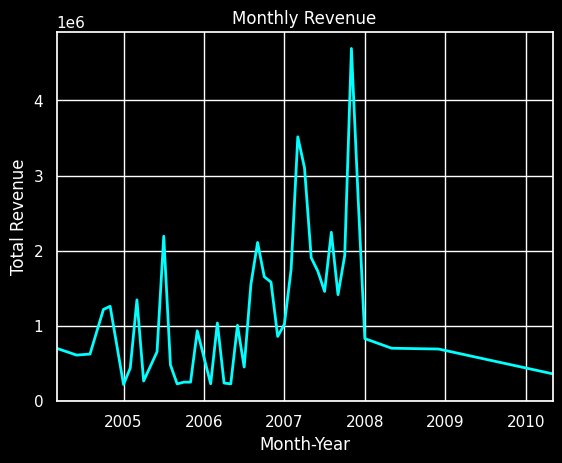

In [ ]:
df["month_year"] = df["date_sale"].dt.to_period("M")
monthly_revenue = df.groupby("month_year")["price"].sum()
monthly_revenue.plot(kind="line", color="cyan", linewidth=2)
plt.title("Monthly Revenue")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")


Apartments Sold by State
Objective: Show the frequency of apartment sales by state, with cumulative frequency to observe distribution.
Chart Type: Pareto chart (bar chart + cumulative line).

Text(0, 0.5, 'Cumulative Percentage')

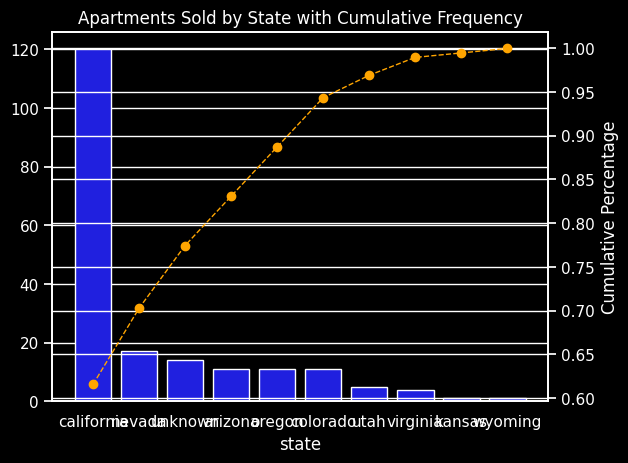

In [ ]:
state_sales = df["state"].value_counts().sort_values(ascending=False)
sns.barplot(x=state_sales.index, y=state_sales.values, color="blue")
cum_sales = state_sales.cumsum() / state_sales.sum()
plt.twinx()
plt.plot(state_sales.index, cum_sales, color="orange", marker="o", linestyle="dashed", linewidth=1)
plt.title("Apartments Sold by State with Cumulative Frequency")
plt.xlabel("State")
plt.ylabel("Number of Apartments Sold")
plt.ylabel("Cumulative Percentage")


Age Distribution
Objective: Analyze customer age distribution based on age_interval.
Chart Type: Histogram.


Text(0, 0.5, 'Frequency')

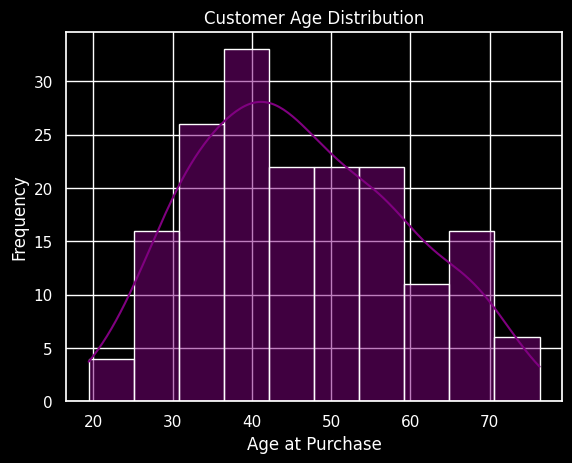

In [ ]:
sns.histplot(df["age_at_purchase"], bins=10, kde=True, color="purple")
plt.title("Customer Age Distribution")
plt.xlabel("Age at Purchase")
plt.ylabel("Frequency")


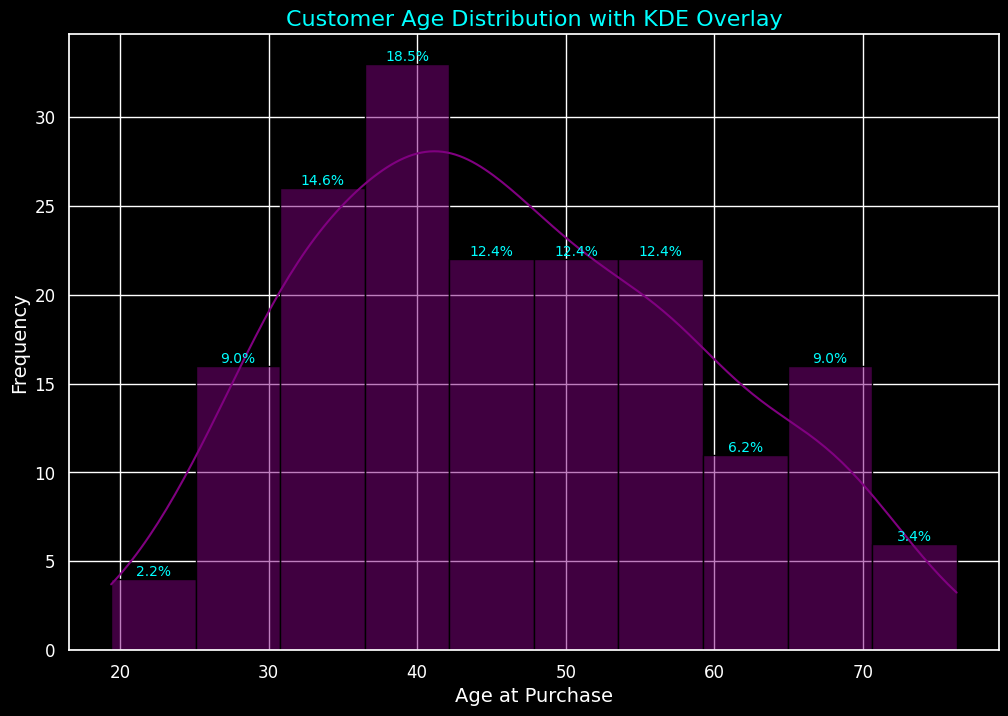

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply a dark theme with Seaborn and Matplotlib
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Plot histogram with KDE for age distribution
plt.figure(figsize=(12, 8))
age_plot = sns.histplot(df["age_at_purchase"], bins=10, kde=True, color="purple", edgecolor="black")

# Calculate the percentages for each bin and add annotations
total = len(df["age_at_purchase"].dropna())
for patch in age_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = f'{(height / total * 100):.1f}%'
        age_plot.annotate(percentage,
                          (patch.get_x() + patch.get_width() / 2, height),
                          ha='center', va='bottom', color="cyan", fontsize=10)

# Customize plot with labels and title
plt.title("Customer Age Distribution with KDE Overlay", fontsize=16, color="cyan")
plt.xlabel("Age at Purchase", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

plt.show()


Yearly Sales for Each Building
Objective: Visualize sales trends by building type over time.
Chart Type: Stacked bar or line graph.

Text(0, 0.5, 'Sales Revenue')

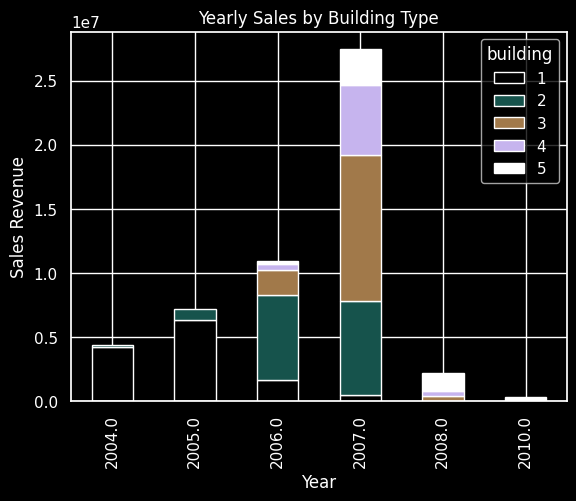

In [ ]:
df["year"] = df["date_sale"].dt.year
yearly_sales = df.groupby(["year", "building"])["price"].sum().unstack()
yearly_sales.plot(kind="bar", stacked=True, colormap="cubehelix")
plt.title("Yearly Sales by Building Type")
plt.xlabel("Year")
plt.ylabel("Sales Revenue")


In [ ]:
print(df.columns)


Index(['unnamed: 0_x', 'id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customer_id', 'unnamed: 0_y', 'entity',
       'name', 'surname', 'birth_date', 'sex', 'country', 'state', 'purpose',
       'deal_satisfaction', 'mortgage', 'source', 'age_at_purchase',
       'age_interval', 'month_year'],
      dtype='object')


Next **Monthly** Revenue of the Company
Chart Type: Time-Series Line Chart
Steps:
Extract month and year from date_sale.
Aggregate total price by month to get monthly revenue.


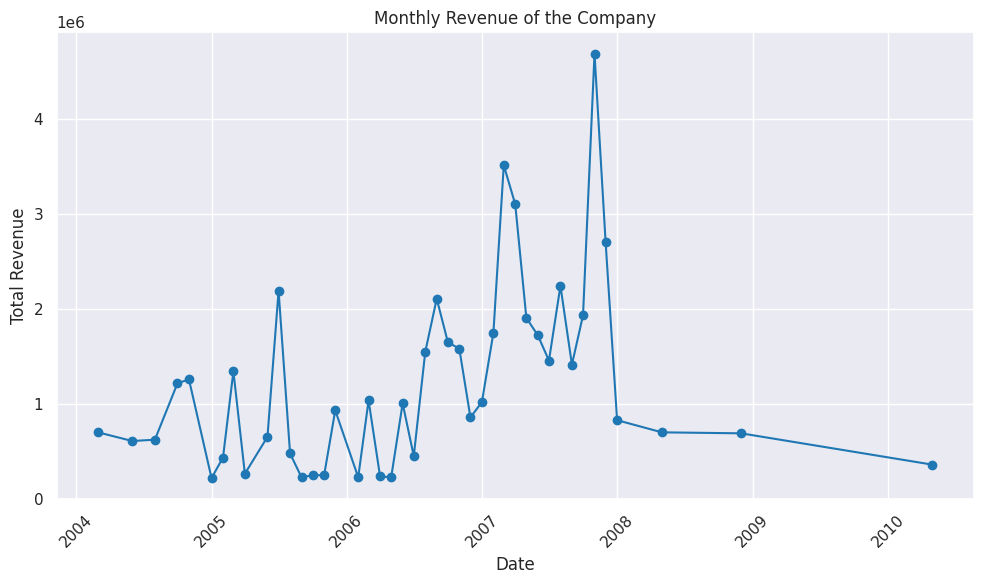

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="darkgrid")

# Assuming the DataFrame is already loaded as df

# 1. Extract year and month from 'date_sale'
df['year'] = df['date_sale'].dt.year
df['month'] = df['date_sale'].dt.month

# 2. Aggregate total price by year and month to get monthly revenue
monthly_revenue = df.groupby(['year', 'month'])['price'].sum().reset_index()

# 3. Create a 'date' column for easy plotting
monthly_revenue['date'] = pd.to_datetime(monthly_revenue[['year', 'month']].assign(day=1))

# 4. Plot the time-series line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['date'], monthly_revenue['price'], marker='o', color='tab:blue')
plt.title('Monthly Revenue of the Company')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Inspect the first few rows of the price column
print(monthly_revenue['price'].head())


0     697655.03
1     606778.27
2     620437.99
3    1214785.83
4    1257352.68
Name: price, dtype: float64


In [ ]:
# Check for any rows where price can't be converted to numeric
invalid_prices = monthly_revenue[~monthly_revenue['price'].apply(pd.to_numeric, errors='coerce').notna()]
print(invalid_prices)


Empty DataFrame
Columns: [month, price]
Index: []


Apartments Sold by State
Chart Type: Pareto Chart
Steps:
Count the number of apartments sold per state.
Plot the absolute frequency using bars.
Plot cumulative frequency on a secondary y-axis.



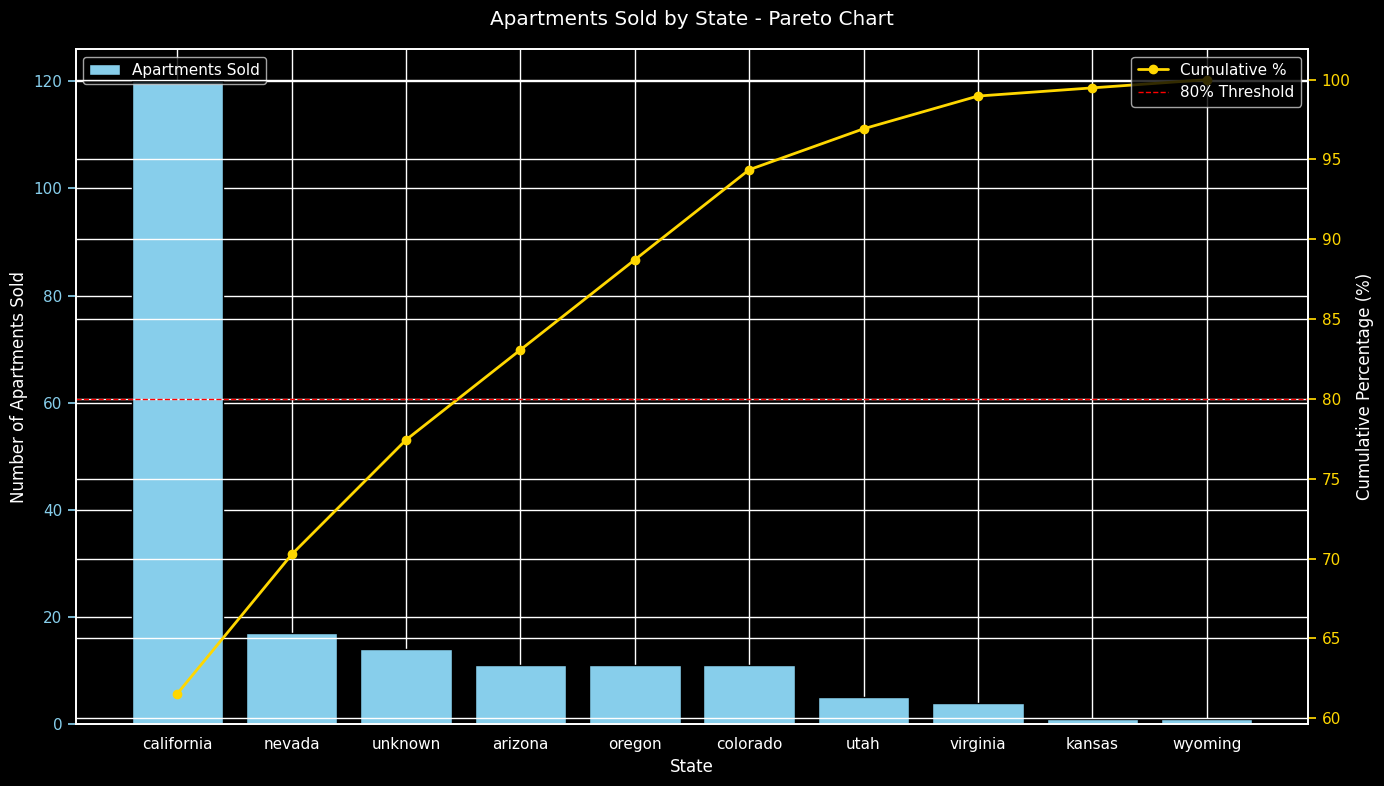

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up dark background style
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Assuming 'state_distribution' is the dataframe you provided
state_distribution = pd.DataFrame({
    'state': ['california', 'nevada', 'unknown', 'arizona', 'oregon', 'colorado', 'utah', 'virginia', 'kansas', 'wyoming'],
    'frequency': [120, 17, 14, 11, 11, 11, 5, 4, 1, 1]
})

# Sort the state distribution by frequency in descending order
state_distribution = state_distribution.sort_values('frequency', ascending=False).reset_index(drop=True)

# Calculate cumulative frequency and cumulative percentage
state_distribution['cumulative_frequency'] = state_distribution['frequency'].cumsum()
state_distribution['cumulative_percentage'] = state_distribution['cumulative_frequency'] / state_distribution['frequency'].sum() * 100

# Plotting the Pareto chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for frequency of apartments sold per state
ax1.bar(state_distribution["state"], state_distribution["frequency"], color="skyblue", edgecolor="black", label="Apartments Sold")
ax1.set_xlabel("State")
ax1.set_ylabel("Number of Apartments Sold")
ax1.tick_params(axis="y", colors="skyblue")
ax1.legend(loc="upper left")

# Line plot for cumulative percentage on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(state_distribution["state"], state_distribution["cumulative_percentage"], color="gold", marker="o", linestyle="-", linewidth=2, label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.tick_params(axis="y", colors="gold")
ax2.axhline(y=80, color="red", linestyle="--", linewidth=1, label="80% Threshold")

# Title and Legends
fig.suptitle("Apartments Sold by State - Pareto Chart")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


**Age Distribution Histogram**
Chart Type: Histogram
Steps:
Use the calculated age from the data preprocessing step.
Use pd.cut with the specified intervals or create 10 equal-length bins.
Plot a histogram showing customer age distribution.



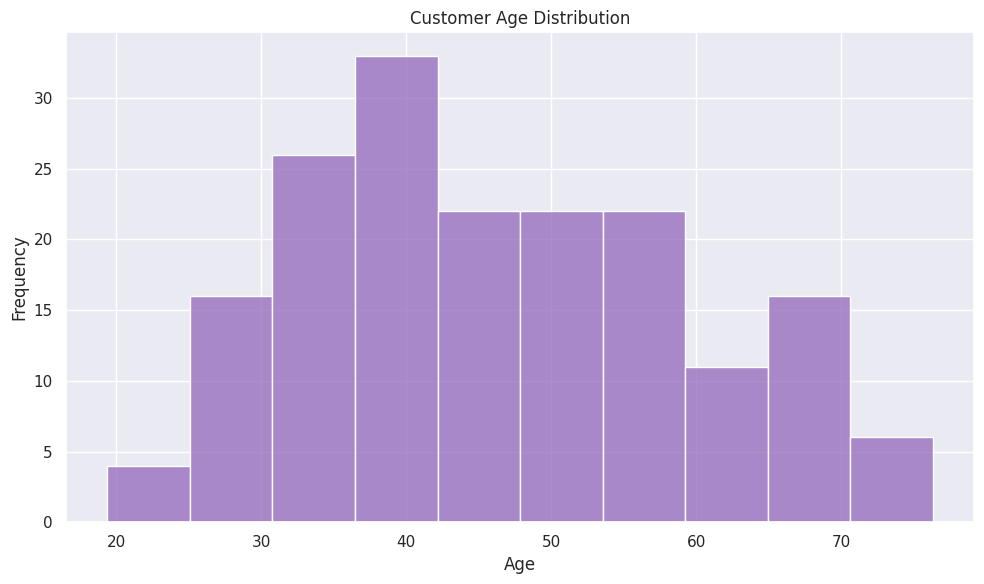

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="darkgrid")

# Assuming the DataFrame is already loaded as df

# 1. Use pd.cut to categorize the 'age_at_purchase' into 10 equal-length bins
age_bins = pd.cut(df['age_at_purchase'].dropna(), bins=10)

# 2. Plot the histogram showing the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age_at_purchase'].dropna(), bins=10, kde=False, color='tab:purple')

# Set labels and title
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


Comprehensive Analysis of Customer Profile, Property Characteristics, and Country Insights
1. Customer Age Profile Analysis:
Key Findings:

The (36, 42] age group shows the highest buyer activity, with 35 properties sold, followed by (31, 36] and (42, 48] age brackets, each with 24 properties sold.
Insight: Buyers in their mid-30s to early 40s are the most active segment, likely in a stable financial position and looking for long-term investments in real estate.
Strategic Implications:

Target Marketing: Create tailored marketing campaigns for the 31–48 age group, emphasizing long-term investment potential and value. Focus on family-friendly neighborhoods, with access to quality schools and community amenities.
Product Offering: Develop housing that meets the needs of buyers looking for long-term living options, such as family-sized homes, proximity to schools, parks, and essential services.
2. Property Price Profile Analysis:
Key Findings:

The (201,705 to 243,776] price range sees the highest sales, with 88 properties sold, followed by the (243,776 to 285,847] price range with 47 properties sold.
Insight: Mid-tier properties priced between 200,000 and 285,000 have the highest demand, with significant drop-offs at higher price points.
Strategic Implications:

Price Point Strategy: Focus on developing properties within the 200,000 to 285,000 range. This price point aligns with the highest sales activity and represents a key opportunity for future growth.
Financing Options: Offer flexible financing solutions, such as mortgages and down payment assistance, to make these mid-tier properties more accessible, particularly to the 31–48 age group.
3. State Distribution Insights:
Key Findings:

California has the highest demand with 120 properties sold, followed by Nevada (17), Unknown (14), and Arizona, Oregon, Colorado (11 each).
Insight: The California market shows the highest demand for real estate, likely driven by its economic activity and population size. Markets like Nevada and Arizona also show potential for growth but may require targeted marketing.
Strategic Implications:

Geographic Focus: Prioritize investments in California, where the highest sales are occurring, while exploring Nevada and Arizona for growth opportunities.
Regional Pricing Strategy: Adjust property pricing strategies based on regional demand, offering competitive pricing in areas with emerging markets such as Nevada or Arizona.
4. Country-Specific Insights:
Key Findings:

Canada has an average area of 917.38 sqm and an average price of 274,069, with perfect deal satisfaction (5.0/5.0).
Germany follows with an average area of 743.41 sqm and an average price of 205,098, also achieving perfect satisfaction.
The USA shows two entries: one with average area of 887.57 sqm and price of 261,679, and another with average area of 901.76 sqm and price of 270,708.
Other countries include UK, Mexico, Russia, and Denmark, with varying price points and satisfaction levels.
Strategic Implications:

Target High Satisfaction Markets: Countries like Canada and Germany, with perfect satisfaction scores and strong property offerings, should be prioritized for expansion or investment. The emphasis should be on maintaining high satisfaction levels through quality properties and customer-centric services.
Area and Price Strategy: In markets like Mexico and Russia, consider adjusting property sizes or price points to match customer preferences. For example, Mexico has a larger average area (1283.45 sqm) but a higher average price (338,181), which may signal a market for larger, more premium properties.
5. Actionable Insights for Real Estate Development Strategy:
Property Development Focus:

Target the 31–48 Age Group: Prioritize properties designed for the 31–48 age group, focusing on family-oriented homes that offer long-term value. Include modern amenities and flexible floor plans suited for family needs.
Mid-Tier Property Investment:

Develop and market properties within the 200,000 to 285,000 price range, as this is where the most significant demand lies. These properties should cater to middle-class buyers looking for affordable yet spacious housing options.
Geographic Focus and Market Expansion:

Focus on California and other high-demand regions for development while also exploring Nevada and Arizona as emerging markets.
In international markets, consider leveraging the Canada and Germany models, which have shown high satisfaction and strong demand, to replicate success.
Incorporating Sustainable Features:

Offer eco-friendly designs and smart home technologies to differentiate properties in the mid-tier price range, especially in markets where sustainability is a growing concern.
Personalized Financing:

Offer customized mortgage products and down payment assistance to make properties more accessible to younger buyers, particularly those in the 31–48 age group.
6. Additional Considerations for Strategic Planning:
Market Segmentation: Further research is required into the demand for specific property types (e.g., single-family homes, townhouses, apartments) across different age groups. Understanding the buyer's preferred living arrangements will help refine development strategies.

Long-Term Trends: Assess potential economic shifts that may affect buyer behavior in the future, such as inflation rates or changes in interest rates. This will help ensure that property pricing and financing plans remain competitive and accessible.

Customer Satisfaction: Focus on maintaining high satisfaction rates, as seen in Canada and Germany, by offering properties that align with market expectations and delivering superior customer service.

# **Conclusion:**
By combining age-specific buyer insights, state-wise demand trends, and country-specific market characteristics, real estate developers can strategically focus on the most lucrative market segments. Developing properties in the 200,000 to 285,000 price range targeted at the 31–48 age group offers significant growth opportunities. Additionally, expanding into high-demand regions like California and international markets such as Canada will bolster long-term success. By aligning product offerings with buyer preferences and offering flexible financing options, developers can capture a larger share of the market while ensuring customer satisfaction.